In [24]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img,save_img
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import Adam
import os
from keras.optimizers import SGD
import keras

In [14]:
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

In [15]:
top_model = Sequential()
top_model.add(Flatten(input_shape=vgg16_model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(2, activation='softmax'))

model = Sequential()
model.add(vgg16_model)
model.add(top_model)

In [16]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
sequential_5 (Sequential)    (None, 2)                 2097922   
Total params: 16,812,610
Trainable params: 16,812,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
train_datagen = ImageDataGenerator(
        rotation_range = 40,      
        width_shift_range = 0.2,  
        height_shift_range = 0.2, 
        rescale = 1./255,         
        shear_range = 0.2,        
        zoom_range  =0.2,         
        horizontal_flip = True,   
        fill_mode='nearest',
)   

test_datagen = ImageDataGenerator(
        rescale = 1/255,
)

In [18]:
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    'imgs/train',
    target_size=(150,150),
    batch_size=batch_size,
)

test_generator = test_datagen.flow_from_directory(
    'imgs/test',
    target_size=(150,150),
    batch_size=batch_size,
)

Found 38444 images belonging to 2 classes.
Found 12000 images belonging to 2 classes.


In [25]:
logdir = os.path.join("callbacks")
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                "model2.h5")
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                    save_best_only = True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]
model.compile(optimizer=SGD(lr=1e-4,momentum=0.9),loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit_generator(train_generator, steps_per_epoch=len(train_generator),
                   epochs=3,validation_data=test_generator,validation_steps=len(test_generator),
                            callbacks = callbacks)
model.save('model2.h5')

Epoch 1/3
1202/1202 [==============================] - 13305s 11s/step - loss: 0.3222 - accuracy: 0.8740 - val_loss: 0.5349 - val_accuracy: 0.9395
Epoch 2/3
1202/1202 [==============================] - 13282s 11s/step - loss: 0.2154 - accuracy: 0.9264 - val_loss: 0.2177 - val_accuracy: 0.9330
Epoch 3/3
1202/1202 [==============================] - 18557s 15s/step - loss: 0.1910 - accuracy: 0.9360 - val_loss: 0.2739 - val_accuracy: 0.9483


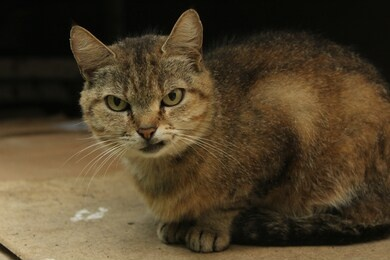

In [26]:
#simple test
image = load_img('angry-street-cat-gray-on-260nw-1445201606.jpg')
label = np.array(['cat','not cat'])
image

In [27]:
image = image.resize((150,150))
image = img_to_array(image)
image = image/255
image = np.expand_dims(image,0)
image.shape
print(label[model.predict_classes(image)])

['cat']
